In [25]:
#Input Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import math

In [ ]:
import pandas as pd
import plotly.graph_objects as go

file_path = 'Data_Subjek1.xlsx'
df = pd.read_excel(file_path, header=None)
df.columns = ['huruf', 'nilai']
data_a = df[df['huruf'] == 'a']['nilai'].reset_index(drop=True)

# Batasi nilai maksimum hingga 350M
data_a = np.clip(data_a, None, 350e6)

jumlahdata = int(np.size(data_a))
fs = 125

# Menghitung elapsed time
elapsed_time = data_a.index * (1 / fs)

fig = go.Figure()
fig.add_trace(go.Scatter(x=elapsed_time, y=data_a, mode='lines', name='ECG (a)', line=dict(color='blue')))
fig.update_layout(
    height=500,
    width=1500,
    title="Plot Data ECG (a)",
    xaxis_title="Elapsed Time",
    yaxis_title="Nilai",
    #yaxis=dict(range=[0, 350e6])
)
fig.show()


**DISCRETE WAVELET TRANSFORM LEVEL 3**

g(n)


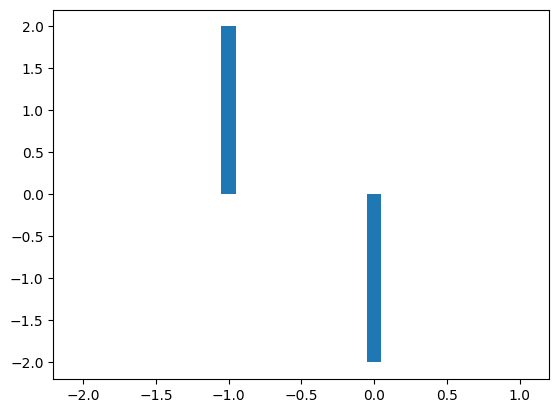

In [27]:
import matplotlib.pyplot as plt
def dirac(x):
    if x == 0:
        dirac_delta = 1
    else:
        dirac_delta = 0
    result = dirac_delta
    return result

h = []
g = []
n_list = []

for n in range(-2, 2):
    n_list.append(n)
    temp_h = 1/8 * (dirac(n-1) + 3*dirac(n) + 3*dirac(n+1) + dirac(n+2))
    h.append(temp_h)
    temp_g = -2 * (dirac(n) - dirac(n+1))
    g.append(temp_g)

print ('g(n)')
plt.bar(n_list, g, 0.1)
plt.show()

Hw


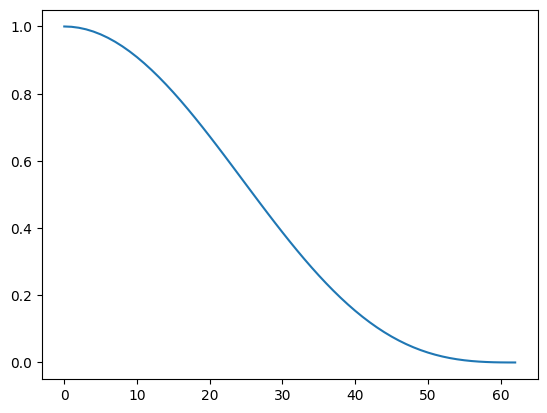

Gw


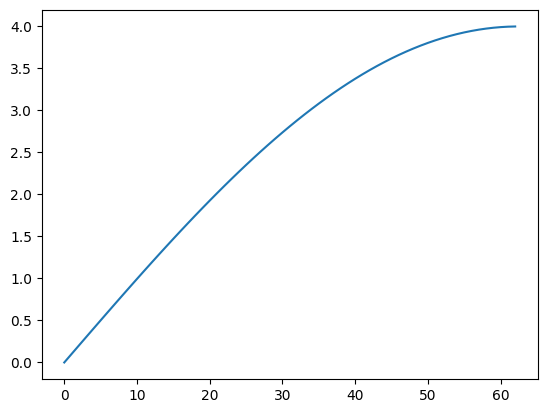

In [28]:
import numpy as np
Hw = np.zeros(20000)
Gw = np.zeros(20000)
i_list = []
for i in range(0,fs + 1):
    i_list.append(i)
    reG = 0
    imG = 0
    reH = 0
    imH = 0
    for k in range(-2, 2):
        reG = reG + g[k + abs(-2)] * np.cos(k * 2 * np.pi * i / fs)
        imG = imG - g[k + abs(-2)] * np.sin(k * 2 * np.pi * i / fs)
        reH = reH + h[k + abs(-2)] * np.cos(k * 2 * np.pi * i / fs)
        imH = imH - h[k + abs(-2)] * np.sin(k * 2 * np.pi * i / fs)
    temp_Hw = np.sqrt((reH**2) + (imH**2))
    temp_Gw = np.sqrt((reG**2) + (imG**2))
    Hw[i] = temp_Hw
    Gw[i] = temp_Gw

i_list = i_list[0:round(fs/2)+1]
print('Hw')
plt.plot(i_list, Hw[0:len (i_list)])
plt.show()
print('Gw')
plt.plot(i_list, Gw[0:len(i_list)])
plt.show()

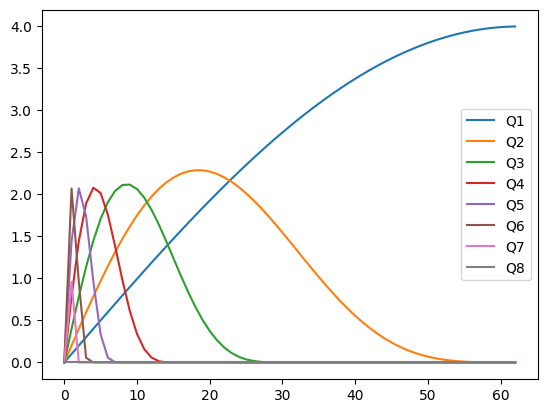

In [29]:
# Create 2D Array
Q= np.zeros((9, round (fs/2)+1))

i_list = []
for i in range(0, round(fs/2)+1):
    i_list.append(i)
    Q[1][i] = Gw[i]
    Q[2][i] = Gw[2*i]*Hw[i]
    Q[3][i] = Gw[4*i]*Hw[2*i]*Hw[i]
    Q[4][i] = Gw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[5][i] = Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[6][i] = Gw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[7][i] = Gw [64*i]*Hw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[8][i] = Gw[128*i]*Hw[64*i]*Hw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
# plot Lines
for i in range(1,9):
    line_label = "Q{}".format(i)
    plt.plot(i_list, Q[i], label = line_label)
# plt.plot(i_list, Q[1])
plt.legend()
plt.show()

a = -1
b = 1


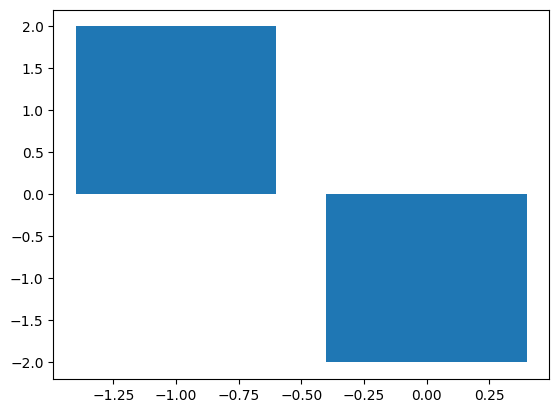

In [30]:
qj = np.zeros ((6, 10000))

k_list = []
j = 1
a = -(round(2**j) + round(2**(j-1)) - 2)
print('a =', a)
b = -(1- round(2**(j-1))) + 1
print('b =', b)
for k in range (a,b):
    k_list.append(k)
    qj[1][k+abs(a)] = -2 * (dirac(k) - dirac(k+1))
plt.bar(k_list, qj[1][0:len(k_list)])
plt.show()

a = -4
b = 2


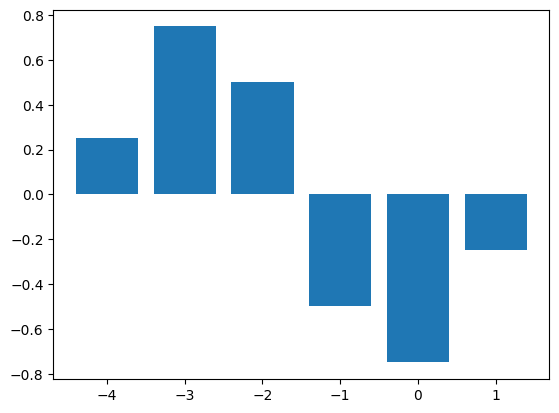

In [31]:
k_list = []
j = 2
a = -(round(2**j) + round(2**(j-1))-2)
print('a =', a)
b = -(1 - round (2**(j-1))) + 1
print('b =', b)
for k in range (a,b):
    k_list.append(k)
    qj[2][k+abs(a)] = -1/4*(dirac (k-1) + 3*dirac(k) + 2*dirac(k+1) - 2*dirac(k+2) - 3*dirac(k+3)- dirac (k+4))
plt.bar(k_list, qj [2][0:len(k_list)])
plt.show()

a = -10
b = 4


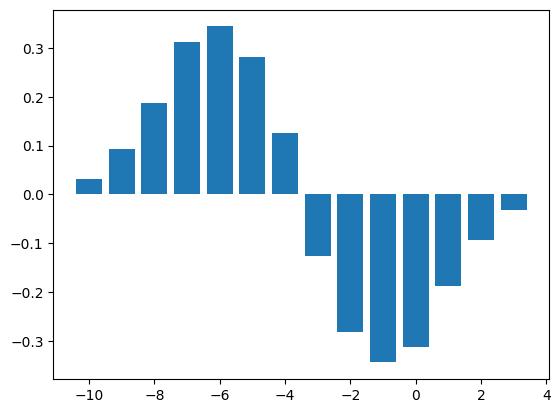

In [32]:
k_list = []
j = 3

a= -(round(2**j) + round (2**(j-1)) -2)
print('a =', a)
b= -(1 - round(2**(j-1))) + 1
print('b =', b)
for k in range (a,b):
    k_list.append(k)
    qj[3][k+abs(a)] = -1/32*(dirac(k-3) + 3*dirac(k-2) + 6*dirac(k-1) + 10*dirac(k)
    + 11*dirac(k+1) + 9*dirac(k+2) + 4*dirac (k+3) - 4*dirac (k+4)- 9*dirac(k+5)
    - 11*dirac (k+6)- 10*dirac (k+7)- 6*dirac (k+8) -3*dirac (k+9) -dirac(k+10))
plt.bar(k_list, qj [3] [0:len(k_list)])
plt.show()

a = -22
b = 8


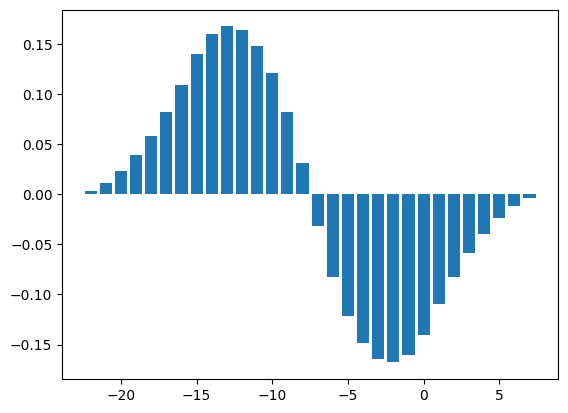

In [33]:
k_list = []
j = 4
a=-(round(2**j) + round(2**(j-1))-2)
print('a =', a)
b = -(1- round(2**(j-1))) + 1
print('b =', b)

for k in range (a,b):
    k_list.append(k)
    qj[4][k+abs(a)] = -1/256*(dirac (k-7) + 3*dirac(k-6) + 6*dirac(k-5) + 10*dirac(k-4) + 15*dirac(k-3)
    + 21*dirac(k-2) + 28*dirac(k-1) + 36*dirac(k) + 41*dirac(k+1) + 43*dirac(k+2)
    + 42*dirac(k+3) + 38*dirac(k+4) + 31*dirac (k+5) + 21*dirac (k+6) + 8*dirac(k+7)
    - 8*dirac(k+8)- 21*dirac (k+9) -31*dirac (k+10) -38*dirac (k+11)- 42*dirac(k+12)
    -43*dirac(k+13) -41*dirac (k+14) -36*dirac (k+15)- 28*dirac (k+16)- 21*dirac(k+17)
    -15*dirac(k+18)- 10*dirac (k+19)- 6*dirac (k+20) -3*dirac (k+21) -dirac(k+22))
plt.bar(k_list, qj [4][0:len(k_list)])
plt.show()

a = -46
b = 16


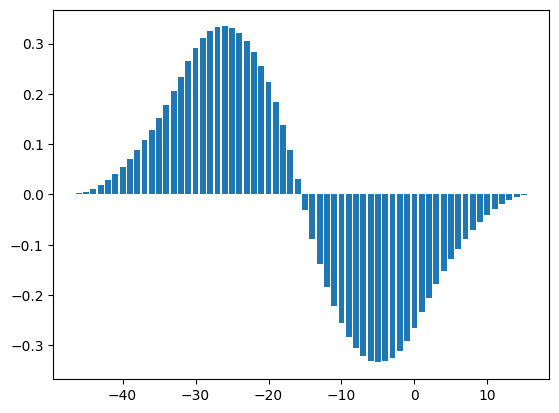

In [34]:
k_list = []
j = 5
a=-(round(2**j) + round(2**(j-1))-2)
print('a =', a)
b= -(1 - round(2**(j-1))) + 1
print('b =', b)
for k in range (a,b):
    k_list.append(k)
    qj[5][k+abs(a)] = -1/(512) * (dirac(k-15) + 3*dirac(k-14) + 6*dirac(k-13) + 10*dirac(k-12) + 15*dirac(k-11) + 21*dirac(k-10)
    + 28*dirac(k-9) + 36*dirac(k-8) + 45*dirac(k-7) + 55*dirac(k-6) + 66*dirac(k-5) + 78*dirac(k-4)
    + 91*dirac(k-3) + 105*dirac(k-2) + 120*dirac(k-1) + 136*dirac(k) + 149*dirac(k+1) + 159*dirac(k+2)
    + 166*dirac(k+3) + 170*dirac(k+4) + 171*dirac(k+5) + 169*dirac(k+6) + 164*dirac(k+7) + 156*dirac(k+8)
    + 145*dirac(k+9) + 131*dirac(k+10) + 114*dirac(k+11) + 94*dirac(k+12) + 71*dirac(k+13) + 45*dirac(k+14)
    + 16*dirac(k+15) - 16*dirac(k+16) - 45*dirac(k+17) - 71*dirac(k+18) - 94*dirac(k+19) - 114*dirac(k+20)
    - 131*dirac(k+21) - 145*dirac(k+22) - 156*dirac(k+23) - 164*dirac(k+24) - 169*dirac(k+25)
    - 171*dirac(k+26) - 170*dirac(k+27) - 166*dirac(k+28) - 159*dirac(k+29) - 149*dirac(k+30)
    - 136*dirac(k+31) - 120*dirac(k+32) - 105*dirac(k+33) - 91*dirac(k+34) - 78*dirac(k+35)
    - 66*dirac(k+36) - 55*dirac(k+37) - 45*dirac(k+38) - 36*dirac(k+39) - 28*dirac(k+40)
    - 21*dirac(k+41) - 15*dirac(k+42) - 10*dirac(k+43) - 6*dirac(k+44) - 3*dirac(k+45)
    - dirac(k+46))
plt.bar(k_list, qj [5] [0:len(k_list)])
plt.show()

a = -46
b = 16


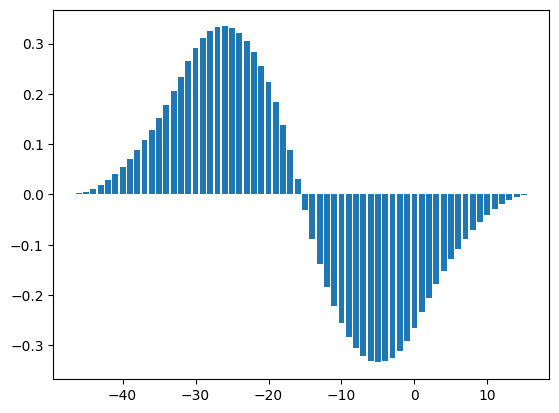

In [35]:
k_list = []
j = 5
a=-(round(2**j) + round(2**(j-1))-2)
print('a =', a)
b= -(1 - round(2**(j-1))) + 1
print('b =', b)
for k in range (a,b):
    k_list.append(k)
    qj[5][k+abs(a)] = -1/(512) * (dirac(k-15) + 3*dirac(k-14) + 6*dirac(k-13) + 10*dirac(k-12) + 15*dirac(k-11) + 21*dirac(k-10)
    + 28*dirac(k-9) + 36*dirac(k-8) + 45*dirac(k-7) + 55*dirac(k-6) + 66*dirac(k-5) + 78*dirac(k-4)
    + 91*dirac(k-3) + 105*dirac(k-2) + 120*dirac(k-1) + 136*dirac(k) + 149*dirac(k+1) + 159*dirac(k+2)
    + 166*dirac(k+3) + 170*dirac(k+4) + 171*dirac(k+5) + 169*dirac(k+6) + 164*dirac(k+7) + 156*dirac(k+8)
    + 145*dirac(k+9) + 131*dirac(k+10) + 114*dirac(k+11) + 94*dirac(k+12) + 71*dirac(k+13) + 45*dirac(k+14)
    + 16*dirac(k+15) - 16*dirac(k+16) - 45*dirac(k+17) - 71*dirac(k+18) - 94*dirac(k+19) - 114*dirac(k+20)
    - 131*dirac(k+21) - 145*dirac(k+22) - 156*dirac(k+23) - 164*dirac(k+24) - 169*dirac(k+25)
    - 171*dirac(k+26) - 170*dirac(k+27) - 166*dirac(k+28) - 159*dirac(k+29) - 149*dirac(k+30)
    - 136*dirac(k+31) - 120*dirac(k+32) - 105*dirac(k+33) - 91*dirac(k+34) - 78*dirac(k+35)
    - 66*dirac(k+36) - 55*dirac(k+37) - 45*dirac(k+38) - 36*dirac(k+39) - 28*dirac(k+40)
    - 21*dirac(k+41) - 15*dirac(k+42) - 10*dirac(k+43) - 6*dirac(k+44) - 3*dirac(k+45)
    - dirac(k+46))
plt.bar(k_list, qj [5] [0:len(k_list)])
plt.show()

In [36]:
# range data yang akan diproses (min s/d max seconds)
mins = 0
maks = elapsed_time[-1]

T1 = round(2**(1-1)) - 1
T2 = round(2**(2-1)) - 1
T3 = round(2**(3-1)) - 1
T4 = round(2**(4-1)) - 1
T5 = round(2**(5-1)) - 1
print('T1 =', T1)
print('T2 =', T2)
print('T3 =', T3)
print('T4 =', T4)
print('T5 =', T5)

T1 = 0
T2 = 1
T3 = 3
T4 = 7
T5 = 15


In [37]:
ecg = data_a
w2fb = np.zeros((4,100000))
N = len(data_a)
#w2fb[i]--> i = orde

n_list = []
for n in range (0, N):
    n_list.append(n)
    for j in range(1,6):
        w2fb[1][n+T1] = 0
        w2fb[2][n+T2] = 0
        w2fb[3][n+T3] = 0
        a = -(round(2**j) + round(2**(j-1))-2)
        b = -(1- round(2**(j-1)))
        for k in range(a,b+1):
            index = n - (k + abs(a))
            if index >= 0 and index < len(ecg):
                w2fb[1][n+T1] = w2fb[1][n+T1]+qj[1][(k+abs(a))]*ecg[n-(k+abs(a))];
                w2fb[2][n+T2] = w2fb[2][n+T2]+qj[2][(k+abs(a))]*ecg[n-(k+abs(a))];
                w2fb[3][n+T3] = w2fb[3][n+T3]+qj[3][(k+abs(a))]*ecg[n-(k+abs(a))];

In [38]:
import plotly.graph_objects as go

# Menyiapkan list untuk menyimpan semua plot
figs = []

# Loop untuk setiap tingkat DWT
for i in range(1, 4):
    # Membuat plot untuk tingkat DWT saat ini
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=elapsed_time, y=w2fb[i][:len(n_list)], mode='lines', name=f'Orde {i}'))
    fig.update_layout(
        title=f'Plot Orde {i}',
        xaxis_title='elapsed_time',
        yaxis_title='Nilai',
        height=400,
        width=1500,
    )
    # Menambahkan plot ke dalam list
    figs.append(fig)

# Menampilkan plot untuk setiap tingkat DWT
for fig in figs:
    fig.show()


**ZERO CROSSING GRADIENT**

In [39]:
gradien1 = np.zeros(N)
gradien2 = np.zeros(N)
gradien3 = np.zeros(N)

delay = T3
for k  in range(delay, N-delay):
    gradien3[k] = w2fb[3][k-delay] - w2fb[3][k+delay]

import plotly.graph_objects as go

# Plot dengan Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=elapsed_time, y=gradien3, mode='lines', name='Gradien 3', line=dict(color='blue')))
fig.update_layout(title='Gradien 3', xaxis_title='Time (s)', yaxis_title='Amplitude (V)', height=400, width=1500)
fig.show()

In [40]:
hasil_QRS = np.zeros(len(elapsed_time))
for i in range(N):
    if (gradien3[i] > 190e6):
        hasil_QRS[i-(T4+1)] = 400e6
    else:
        hasil_QRS[i-(T4+1)] = 0

In [41]:
import plotly.graph_objects as go

# Plot dengan Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=elapsed_time, y=hasil_QRS, mode='lines', name='QRS Detection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=elapsed_time, y=data_a, mode='lines', name='Raw ECG', line=dict(color='red')))
fig.update_layout(title='QRS Detection', xaxis_title='Time (s)', yaxis_title='Amplitude (V)', height=400, width=1400)
fig.update_layout(legend=dict(x=15, y=1, traceorder='normal', font=dict(size=12)))
fig.show()


In [42]:
ptp = 0
waktu = np.zeros(np.size(hasil_QRS))
selisih = np.zeros(np.size(hasil_QRS))

for n in range(np.size(hasil_QRS) - 1):
    if hasil_QRS[n] < hasil_QRS[n + 1]:
        waktu[ptp] = n / fs;
        selisih[ptp] = waktu[ptp] - waktu[ptp - 1]
        ptp += 1

ptp = ptp - 1
ptp

238

In [43]:
j = 0
peak = np.zeros(np.size(hasil_QRS))
for n in range(np.size(hasil_QRS)-1):
    if hasil_QRS[n] == 400e6 and hasil_QRS[n-1] == 0:
        peak[j] = n
        j += 1
j

239

In [44]:
temp = 0
interval = np.zeros(np.size(hasil_QRS))
BPM = np.zeros(np.size(hasil_QRS))

for n in range(ptp):
    interval[n] = (peak[n] - peak[n-1]) / fs
    BPM[n] = 60 / interval[n]
    temp = temp+BPM[n]
    rata = temp / (n - 1)
rata

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10324\171517553.py:9: RuntimeWarning:

divide by zero encountered in scalar divide



101.56224986586426

# **Time Domain HRV ANALYSIS**

**SDNN (Standard Deviation of RR-Intervals)**

In [45]:
RR_SDNN=0
for n in range (ptp):
   RR_SDNN += (((selisih[n])-(60/rata))**2)

SDNN = math.sqrt (RR_SDNN/ (ptp-1))

SDNN

0.4572365118392593

**RMSSD (Root Mean Sum of Squared Distance)**

In [46]:
RR_RMSSD=0
for n in range (ptp):
   RR_RMSSD += ((selisih[n+1]-selisih[n])**2)
RMSSD =  math. sqrt (RR_RMSSD/(ptp-1))
RMSSD

0.5848589717851972

**pNN50**

In [47]:
NN50 = 0

for n in range (ptp):
    if (abs(selisih[n+1]-selisih[n])>0.05):
      NN50 +=1
pNN50 = (NN50/ (ptp-1)) *100
pNN50

90.71729957805907

**SDSD**

In [48]:
dif = 0
for n in range (ptp):
  dif += abs(selisih[n]-selisih[n+1])
RRdif = dif/(ptp-1)

RR_SDSD = 0
for n in range (ptp):
  RR_SDSD += (((abs(selisih[n]-selisih[n+1]))-RRdif)**2)
SDSD = math.sqrt(RR_SDSD/(ptp-2))

SDSD

0.3694535729370128

**TACHOGRAM**

In [49]:
bpm_rr = np.zeros(ptp)
for n in range (ptp):
  bpm_rr[n] = 60/selisih[n]
  if bpm_rr [n]>100:
    bpm_rr[n]=rata
bpm_rr
n = np. arange(0,ptp,1,dtype=int)
fig = go.Figure(data=go.Scatter(x=n, y=bpm_rr, mode='lines'))
fig.update_layout(
    title="TACHOGRAM",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig.show()

**HISTOGRAM**

In [50]:
import plotly.graph_objects as go

# Plot dengan Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(x=bpm_rr, nbinsx=ptp))
fig.update_layout(title='Histogram', xaxis_title='BPM', yaxis_title='Frequency')
fig.update_layout(xaxis=dict(range=[0, 100]), yaxis=dict(range=[0, 10]))
fig.show()

# **Frequency Domain HRV ANALYSIS**

In [77]:
#normalisasi tachogram
bpm_rr_baseline = bpm_rr - 70

# Plotting dengan Plotly
n = np.arange(0, ptp, 1, dtype=int)
fig = go.Figure(data=go.Scatter(x=n, y=bpm_rr_baseline, mode='lines'))
fig.update_layout(
    title="TACHOGRAM",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

**PSD WELCH'S METHOD - SEGMENTASI**

In [78]:
# Ambil subset data dari 0 sampai 50
n = np.arange(0, ptp, 1, dtype=int)
n_subset = n[0:50] #ambil subset 0-50 data
bpm_rr_baseline_subset = bpm_rr_baseline[0:50]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset, y=bpm_rr_baseline_subset, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 0-49)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [79]:
n_subset = n[0:50]
bpm_rr_baseline_subset = bpm_rr_baseline[0:50]
M = len(bpm_rr_baseline_subset) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed = bpm_rr_baseline_subset * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result = fourier_transform(bpm_rr_baseline_windowed)
sampling_rate = 60/rata
fft_freq = calculate_frequency(len(bpm_rr_baseline_windowed), sampling_rate)
half_point = len(fft_freq) // 2
fft_freq_half = fft_freq[:half_point]
fft_result_half = fft_result[:half_point]

fig1 = go.Figure(data=go.Scatter(x=n_subset, y=bpm_rr_baseline_windowed, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 0-49) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half, y=np.abs(fft_result_half),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [80]:
# Ambil subset data dari 25 sampai 75
n = np.arange(0, ptp, 1, dtype=int)
n_subset1 = n[25:75]
bpm_rr_baseline_subset1 = bpm_rr_baseline[25:75]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset1, y=bpm_rr_baseline_subset1, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 25-75)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [81]:
n_subset1 = n[25:75]
bpm_rr_baseline_subset1 = bpm_rr_baseline[25:75]
M = len(bpm_rr_baseline_subset1) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed1 = bpm_rr_baseline_subset1 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result1 = fourier_transform(bpm_rr_baseline_windowed1)
sampling_rate = 60/rata
fft_freq1 = calculate_frequency(len(bpm_rr_baseline_windowed1), sampling_rate)
half_point1 = len(fft_freq1) // 2
fft_freq_half1 = fft_freq1[:half_point1]
fft_result_half1 = fft_result1[:half_point1]

fig1 = go.Figure(data=go.Scatter(x=n_subset1, y=bpm_rr_baseline_windowed1, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 25-75) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half1, y=np.abs(fft_result_half1),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [82]:
# Ambil subset data dari 50 sampai 100
n = np.arange(0, ptp, 1, dtype=int)
n_subset2 = n[50:100] #ambil subset 0-50 data
bpm_rr_baseline_subset2 = bpm_rr_baseline[50:100]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset2, y=bpm_rr_baseline_subset2, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 50-100)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [83]:
n_subset2 = n[50:100]
bpm_rr_baseline_subset2 = bpm_rr_baseline[50:100]
M = len(bpm_rr_baseline_subset2) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed2 = bpm_rr_baseline_subset2 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result2 = fourier_transform(bpm_rr_baseline_windowed2)
sampling_rate = 60/rata
fft_freq2 = calculate_frequency(len(bpm_rr_baseline_windowed2), sampling_rate)
half_point2 = len(fft_freq2) // 2
fft_freq_half2 = fft_freq2[:half_point2]
fft_result_half2 = fft_result2[:half_point2]

fig1 = go.Figure(data=go.Scatter(x=n_subset2, y=bpm_rr_baseline_windowed2, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 50-100) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half2, y=np.abs(fft_result_half2),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [84]:
# Ambil subset data dari 75 sampai 125
n = np.arange(0, ptp, 1, dtype=int)
n_subset3 = n[75:125] #ambil subset 0-50 data
bpm_rr_baseline_subset3 = bpm_rr_baseline[75:125]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset3, y=bpm_rr_baseline_subset3, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 75-125)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [85]:
n_subset3 = n[75:125]
bpm_rr_baseline_subset3 = bpm_rr_baseline[75:125]
M = len(bpm_rr_baseline_subset3) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed3 = bpm_rr_baseline_subset3 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result3 = fourier_transform(bpm_rr_baseline_windowed3)
sampling_rate = 60/rata
fft_freq3 = calculate_frequency(len(bpm_rr_baseline_windowed3), sampling_rate)
half_point3 = len(fft_freq3) // 2
fft_freq_half3 = fft_freq3[:half_point3]
fft_result_half3 = fft_result3[:half_point3]

fig1 = go.Figure(data=go.Scatter(x=n_subset3, y=bpm_rr_baseline_windowed3, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 75-125) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half3, y=np.abs(fft_result_half3),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [86]:
# Ambil subset data dari 100 sampai 150
n = np.arange(0, ptp, 1, dtype=int)
n_subset4 = n[100:150]
bpm_rr_baseline_subset4 = bpm_rr_baseline[100:150]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset4, y=bpm_rr_baseline_subset4, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 100-150)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [87]:
n_subset4 = n[100:150]
bpm_rr_baseline_subset4 = bpm_rr_baseline[100:150]
M = len(bpm_rr_baseline_subset4) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed4 = bpm_rr_baseline_subset4 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result4 = fourier_transform(bpm_rr_baseline_windowed4)
sampling_rate = 60/rata
fft_freq4 = calculate_frequency(len(bpm_rr_baseline_windowed4), sampling_rate)
half_point4 = len(fft_freq4) // 2
fft_freq_half4 = fft_freq4[:half_point4]
fft_result_half4 = fft_result4[:half_point4]

fig1 = go.Figure(data=go.Scatter(x=n_subset4, y=bpm_rr_baseline_windowed4, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 100-150) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half4, y=np.abs(fft_result_half4),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [88]:
# Ambil subset data dari 125 sampai 175
n = np.arange(0, ptp, 1, dtype=int)
n_subset5 = n[125:175]
bpm_rr_baseline_subset5 = bpm_rr_baseline[125:175]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset5, y=bpm_rr_baseline_subset5, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 125-175)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [89]:
n_subset5 = n[125:175]
bpm_rr_baseline_subset5 = bpm_rr_baseline[125:175]
M = len(bpm_rr_baseline_subset5) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed5 = bpm_rr_baseline_subset5 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result5 = fourier_transform(bpm_rr_baseline_windowed5)
sampling_rate = 60/rata
fft_freq5 = calculate_frequency(len(bpm_rr_baseline_windowed5), sampling_rate)
half_point5 = len(fft_freq5) // 2
fft_freq_half5 = fft_freq5[:half_point5]
fft_result_half5 = fft_result5[:half_point5]

fig1 = go.Figure(data=go.Scatter(x=n_subset5, y=bpm_rr_baseline_windowed5, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 125-175) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half5, y=np.abs(fft_result_half5),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [90]:
# Ambil subset data dari 150 sampai 200
n = np.arange(0, ptp, 1, dtype=int)
n_subset6 = n[150:200]
bpm_rr_baseline_subset6 = bpm_rr_baseline[150:200]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset6, y=bpm_rr_baseline_subset6, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 150-200)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [91]:
n_subset6 = n[150:200]
bpm_rr_baseline_subset6 = bpm_rr_baseline[150:200]
M = len(bpm_rr_baseline_subset6) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed6 = bpm_rr_baseline_subset6 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result6 = fourier_transform(bpm_rr_baseline_windowed6)
sampling_rate = 60/rata
fft_freq6 = calculate_frequency(len(bpm_rr_baseline_windowed6), sampling_rate)
half_point6 = len(fft_freq6) // 2
fft_freq_half6 = fft_freq6[:half_point6]
fft_result_half6 = fft_result6[:half_point6]

fig1 = go.Figure(data=go.Scatter(x=n_subset6, y=bpm_rr_baseline_windowed6, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 150-200) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half6, y=np.abs(fft_result_half6),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [92]:
# Ambil subset data dari 175 sampai 225
n = np.arange(0, ptp, 1, dtype=int)
n_subset7 = n[175:225]
bpm_rr_baseline_subset7 = bpm_rr_baseline[175:225]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset7, y=bpm_rr_baseline_subset7, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 175:225)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [93]:
n_subset7 = n[175:225]
bpm_rr_baseline_subset7 = bpm_rr_baseline[175:225]
M = len(bpm_rr_baseline_subset7) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed7 = bpm_rr_baseline_subset7 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result7 = fourier_transform(bpm_rr_baseline_windowed7)
sampling_rate = 60/rata
fft_freq7 = calculate_frequency(len(bpm_rr_baseline_windowed7), sampling_rate)
half_point7 = len(fft_freq7) // 2
fft_freq_half7 = fft_freq7[:half_point7]
fft_result_half7 = fft_result7[:half_point7]

fig1 = go.Figure(data=go.Scatter(x=n_subset7, y=bpm_rr_baseline_windowed7, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 175-225) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half7, y=np.abs(fft_result_half7),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [94]:
# Ambil subset data dari 200 sampai 250
n = np.arange(0, ptp, 1, dtype=int)
n_subset8 = n[200:250]
bpm_rr_baseline_subset8 = bpm_rr_baseline[200:250]

# Plotting subset data
fig = go.Figure(data=go.Scatter(x=n_subset8, y=bpm_rr_baseline_subset8, mode='lines'))
fig.update_layout(
    title="TACHOGRAM (Subset 200-250)",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

In [95]:
n_subset8 = n[200:250]
bpm_rr_baseline_subset8 = bpm_rr_baseline[200:250]
M = len(bpm_rr_baseline_subset8) - 1
hamming_window = np.zeros(M+1)

for i in range(M+1):
    hamming_window[i] = 0.54 - 0.46 * np.cos(2 * np.pi * i / M)
bpm_rr_baseline_windowed8 = bpm_rr_baseline_subset8 * hamming_window

def fourier_transform(signal):
    N = len(signal)
    fft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            fft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return fft_result

def calculate_frequency(N, sampling_rate):
    return np.arange(N) * sampling_rate / N

# Compute Fourier Transform
fft_result8 = fourier_transform(bpm_rr_baseline_windowed8)
sampling_rate = 60/rata
fft_freq8 = calculate_frequency(len(bpm_rr_baseline_windowed8), sampling_rate)
half_point8 = len(fft_freq8) // 2
fft_freq_half8 = fft_freq8[:half_point8]
fft_result_half8 = fft_result8[:half_point8]

fig1 = go.Figure(data=go.Scatter(x=n_subset8, y=bpm_rr_baseline_windowed8, mode='lines'))
fig1.update_layout(
    title="TACHOGRAM (Subset 200-250) with Hamming Window",
    xaxis_title="n",
    yaxis_title="BPM",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig1.show()
# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_half8, y=np.abs(fft_result_half8),mode="lines"))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)
fig_fft.show()

In [96]:
FFT_TOTAL = (fft_result + fft_result1 +  fft_result2 + fft_result3 + fft_result4 + fft_result5 + fft_result6 + fft_result7) / 8
FFT_FREQ_TOTAL = (fft_freq + fft_freq1 + fft_freq2 +  fft_freq3 +  fft_freq4 +  fft_freq5 +  fft_freq6 +  fft_freq7)/ 8

half_point_total = len(FFT_FREQ_TOTAL) // 2
fft_freq_total = FFT_FREQ_TOTAL[:half_point_total]
fft_result_total = FFT_TOTAL[:half_point_total]

# Membuat grafik FFT
fig_fft = go.Figure(data=go.Scatter(x=fft_freq_total, y=np.abs(fft_result_total), mode='lines'))
fig_fft.update_layout(
    title="FFT of TACHOGRAM",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Magnitude",
    xaxis=dict(showline=True, showgrid=True),
    yaxis=dict(showline=True, showgrid=True)
)

fig_fft.show()

In [71]:
# Fungsi untuk interpolasi manual
def manual_interpolation(x, xp, fp):
    return np.interp(x, xp, fp)

# Frequency bands
x_ulf = np.linspace(0.001, 0.003, 99)
x_vlf = np.linspace(0.003, 0.04, 99)
x_lf = np.linspace(0.04, 0.15, 99)
x_hf = np.linspace(0.15, 0.4, 99)

y_ulf = manual_interpolation(x_ulf, fft_freq_total, np.abs(fft_result_total))
y_vlf = manual_interpolation(x_vlf, fft_freq_total, np.abs(fft_result_total))
y_lf = manual_interpolation(x_lf, fft_freq_total, np.abs(fft_result_total))
y_hf = manual_interpolation(x_hf, fft_freq_total, np.abs(fft_result_total))

In [72]:
# Buat plot spektrum FFT
fig = go.Figure()

# Tambahkan garis spektrum FFT
fig.add_trace(go.Scatter(
    x=fft_freq_total,
    y=np.abs(fft_result_total),
    mode='lines',
    line=dict(color='black', width=0.3),
    name='FFT Spectrum'
))
# Isi antara pita frekuensi ULF
fig.add_trace(go.Scatter(
    x=x_ulf,
    y=y_ulf,
    fill='tozeroy',
    fillcolor='rgba(0, 0, 255, 0.2)',
    line=dict(color='rgba(0, 0, 255, 0.5)'),
    name='ULF'
))
# Isi antara pita frekuensi VLF
fig.add_trace(go.Scatter(
    x=x_vlf,
    y=y_vlf,
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.2)',
    line=dict(color='rgba(255, 0, 0, 0.5)'),
    name='VLF'
))
# Isi antara pita frekuensi LF
fig.add_trace(go.Scatter(
    x=x_lf,
    y=y_lf,
    fill='tozeroy',
    fillcolor='rgba(255, 165, 0, 0.2)',
    line=dict(color='rgba(255, 165, 0, 0.5)'),
    name='LF'
))
# Isi antara pita frekuensi HF
fig.add_trace(go.Scatter(
    x=x_hf,
    y=y_hf,
    fill='tozeroy',
    fillcolor='rgba(0, 128, 0, 0.2)',
    line=dict(color='rgba(0, 128, 0, 0.5)'),
    name='HF'
))
# Menambahkan judul dan label sumbu
fig.update_layout(
    title="FFT Spectrum (Welch's periodogram)",
    xaxis_title="Frequency (Hz)",
    yaxis_title="Density",
    xaxis=dict(range=[0, 0.5]),
    yaxis=dict(range=[0, max(np.abs(fft_result_total))]),
    legend=dict(x=0.8, y=0.95)
)

fig.show()

In [73]:
# Fungsi untuk menghitung trapesoidal rule
def trapezoidal_rule(y, x):
    return np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1]) / 2)

# Hitung Total Power (TP) menggunakan metode trapesium manual
TP = trapezoidal_rule(np.abs(fft_result_total), fft_freq_total)

# Hitung nilai VLF, LF, dan HF menggunakan metode trapesium manual
ULF = trapezoidal_rule(y_ulf, x_ulf)
VLF = trapezoidal_rule(y_vlf, x_vlf)
LF = trapezoidal_rule(y_lf, x_lf)
HF = trapezoidal_rule(y_hf, x_hf)
total_power = VLF + LF + HF

# Hitung LF dan HF yang dinormalisasi
LF_norm = LF / (total_power - VLF)
HF_norm = HF / (total_power - VLF)

LF_HF = LF / HF

print("Total Power (TP):", TP)
print("VLF:", VLF)
print("LF:", LF)
print("HF:", HF)
print("Normalized LF:", LF_norm)
print("Normalized HF:", HF_norm)
print("LF/HF ratio:", LF_HF)


Total Power (TP): 18.479777393939678
VLF: 3.667792385606588
LF: 3.1510114050275404
HF: 8.967572899758064
Normalized LF: 0.2600148107880235
Normalized HF: 0.7399851892119765
LF/HF ratio: 0.3513783986202723


Category: 8


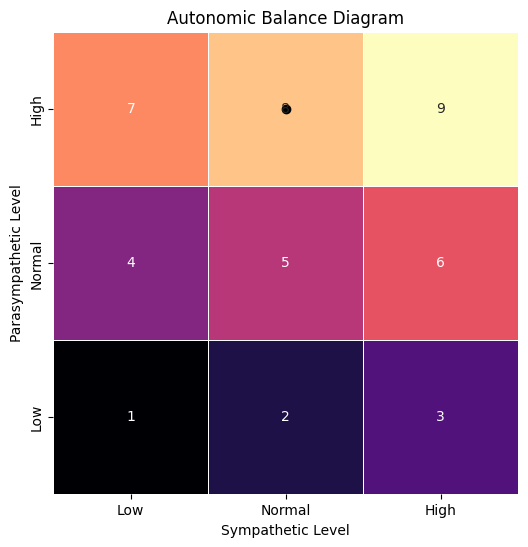

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

def determine_category(LF_norm, HF_norm, LF_HF):
    if LF_norm < 0.2 and HF_norm < 0.2:
        return 1  # Low - Low
    elif LF_norm >= 0.2 and LF_norm <= 0.6 and HF_norm < 0.2:
        return 2  # Normal - Low
    elif LF_norm > 0.6 and HF_norm < 0.2:
        return 3  # High - Low
    elif LF_norm < 0.2 and HF_norm >= 0.2 and HF_norm <= 0.6:
        return 4  # Low - Normal
    elif LF_norm >= 0.2 and LF_norm <= 0.6 and HF_norm >= 0.2 and HF_norm <= 0.6:
        return 5  # Normal - Normal
    elif LF_norm > 0.6 and HF_norm >= 0.2 and HF_norm <= 0.6:
        return 6  # High - Normal
    elif LF_norm < 0.2 and HF_norm > 0.6:
        return 7  # Low - High
    elif LF_norm >= 0.2 and LF_norm <= 0.6 and HF_norm > 0.6:
        return 8  # Normal - High
    elif LF_norm > 0.6 and HF_norm > 0.6:
        return 9  # High - High
    else:
        return 0  # Undefined

data = [
    [7, 8, 9],
    [4, 5, 6],
    [1, 2, 3]
]

# Buat heatmap
plt.figure(figsize=(6, 6))
ax = sns.heatmap(data, annot=True, fmt="d", cmap="magma", cbar=False, linewidths=.5)
coordinates = {
    1: (2, 0),
    2: (2, 1),
    3: (2, 2),
    4: (1, 0),
    5: (1, 1),
    6: (1, 2),
    7: (0, 0),
    8: (0, 1),
    9: (0, 2)
}

category = determine_category(LF_norm, HF_norm, LF_HF)
print("Category:", category)
coord = coordinates.get(category, None)

# Tandai kategori pada heatmap
if coord:
    ax.plot(coord[1] + 0.5, coord[0] + 0.5, 'ko')

plt.title("Autonomic Balance Diagram")
plt.xlabel("Sympathetic Level")
plt.ylabel("Parasympathetic Level")
plt.xticks([0.5, 1.5, 2.5], ["Low", "Normal", "High"])
plt.yticks([0.5, 1.5, 2.5], ["High", "Normal", "Low"])
plt.show()

**POINTCARE PLOT**

SD1: 0.41351429862341743
SD2: 0.3796651944120752
S: 0.49322057967242444
SD_ratio: 1.0891551417131053


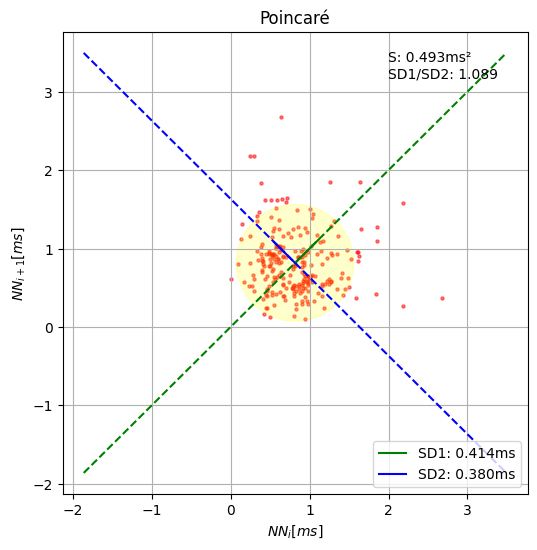

In [75]:
# Calculating intervals and BPM
temp = 0
interval = np.zeros(ptp)
BPM = np.zeros(ptp)
for n in range(1, ptp):
    interval[n] = (peak[n] - peak[n-1]) * (1/fs)
    BPM[n] = 60 / interval[n]
    temp += BPM[n]
rata = temp / (ptp - 1)

def create_poincare_plot(interval):
    # Menghitung Poincaré Plot
    x = interval[:-1]
    y = interval[1:]
    
    # Calculating SD1 and SD2
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    diff1 = (x - x_mean) + (y - y_mean)
    diff2 = (x - x_mean) - (y - y_mean)
    SD1 = np.sqrt(np.var(diff2) / 2)
    SD2 = np.sqrt(np.var(diff1) / 2)
    S = np.pi * SD1 * SD2
    SD_ratio = SD1 / SD2
    
    print("SD1:", SD1)
    print("SD2:", SD2)
    print("S:", S)
    print("SD_ratio:", SD_ratio)

    # Plot Poincaré Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=5, c='red', alpha=0.5)

    # Ellipse
    ellipse = plt.Circle((x_mean, y_mean), 1.96 * SD2, color='yellow', alpha=0.2)
    plt.gca().add_artist(ellipse)
    
    # SD1 and SD2 lines
    plt.plot([x_mean, x_mean + SD1 * np.cos(np.pi/4)], [y_mean, y_mean + SD1 * np.sin(np.pi/4)], 'g', label=f'SD1: {SD1:.3f}ms')
    plt.plot([x_mean, x_mean + SD2 * np.cos(3*np.pi/4)], [y_mean, y_mean + SD2 * np.sin(3*np.pi/4)], 'b', label=f'SD2: {SD2:.3f}ms')

    # Diagonal lines through the mean point
    line_length = max(max(x), max(y))
    plt.plot([x_mean - line_length, x_mean + line_length], [y_mean - line_length, y_mean + line_length], 'g--')
    plt.plot([x_mean - line_length, x_mean + line_length], [y_mean + line_length, y_mean - line_length], 'b--')
    
    # Annotations
    plt.title('Poincaré')
    plt.xlabel(r'$NN_{i} [ms]$')
    plt.ylabel(r'$NN_{i+1} [ms]$')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.annotate(f'S: {S:.3f}ms²\nSD1/SD2: {SD_ratio:.3f}', xy=(0.7, 0.9), xycoords='axes fraction')
    
    plt.show()

create_poincare_plot(interval)

Intervals: [0.    0.616 0.816 ... 0.    0.    0.   ]


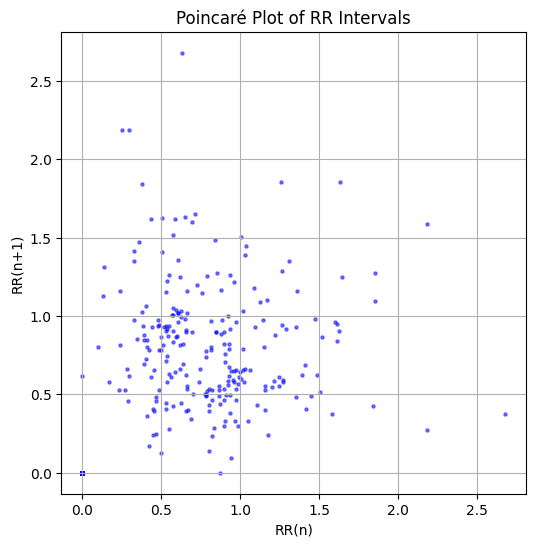

SD1: 0.039881717880857995
SD2: 0.517434246246172


In [76]:
temp=0
interval=np.zeros(np.size(hasil_QRS))
BPM=np.zeros(np.size(hasil_QRS))

# Calculate intervals and BPM
for n in range(1, ptp):
    interval[n] = (peak[n] - peak[n-1]) * (1/fs)
    BPM[n] = 60 / interval[n]
    temp += BPM[n]
    rata = temp / n  # Modified to avoid division by zero

print("Intervals:", interval)

# Define the Poincaré plot function
def create_poincare_plot(interval):
    x = interval[:-1]
    y = interval[1:]

    # Plot Poincaré Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=5, c='blue', alpha=0.5)
    plt.title('Poincaré Plot of RR Intervals')
    plt.xlabel('RR(n)')
    plt.ylabel('RR(n+1)')
    plt.grid(True)
    plt.show()

create_poincare_plot(interval)

# Calculate SD1 and SD2
diff_intervals = np.diff(interval)
mean_interval = np.mean(interval)
SD1 = np.std(diff_intervals) / np.sqrt(2)
SD2 = np.sqrt(2 * np.std(interval)*2 - SD1*2)

print(f"SD1: {SD1}")
print(f"SD2: {SD2}")